In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
dossier_parent = 'C:/Users/datas/DSTI_2324/Hackathon/Phase_2/v20250408/HackathonApPic/streamlit_app/static/donnees/donnees_raw/donnees_par_defaut/'
dossier = dossier_parent + 'Wind_onshore/'
#dossier = dossier_parent + 'Donnees_Consommation_Electrique/'
chemin_fichier = dossier + 'data.csv'

# Extraction

In [74]:
df = pd.read_csv(chemin_fichier, sep=";", header=None, encoding='latin-1', decimal=',')

# Add column titles
df.columns = ['Time','Bits/s']

df.head()

,Time,Bits/s
0,2015-01-01 00:15:00,69.96
1,2015-01-01 00:30:00,69.80
2,2015-01-01 00:45:00,65.85
3,2015-01-01 01:00:00,62.23
4,2015-01-01 01:15:00,62.87


# Transformation

In [75]:
# Rescale the time in seconds
df['Time'] = pd.date_range(start='2000-01-01 00:00:00', periods=len(df), freq='S')

# Supprimer les lignes avec au moins une cellule vide
df = df.dropna()

# Replace commas with dots in the 2nd column
#df.iloc[:, 1] = df.iloc[:, 1].astype(str).str.replace(",", ".")

# Convert numbers to float and then to integer
df['Bits/s'] = df['Bits/s'].astype(float).astype(int)

df.head()

C:\Users\datas\AppData\Local\Temp\ipykernel_21336\3584457392.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Time'] = pd.date_range(start='2000-01-01 00:00:00', periods=len(df), freq='S')


,Time,Bits/s
0,2000-01-01 00:00:00,69
1,2000-01-01 00:00:01,69
2,2000-01-01 00:00:02,65
3,2000-01-01 00:00:03,62
4,2000-01-01 00:00:04,62


# Chargement

In [76]:
df.to_csv(dossier + 'raw.csv', index=False)

# Plot

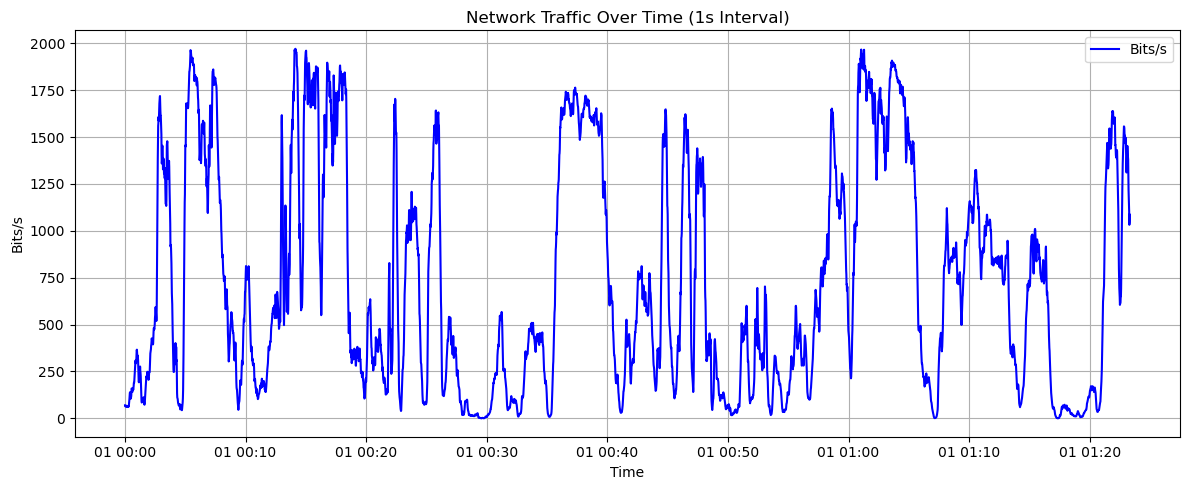

In [77]:
# Renommer les colonnes si nécessaire
df.columns = ["Time", "Bits/s"]

# Convertir la colonne Time en datetime
df["Time"] = pd.to_datetime(df["Time"])

# Définir la variable n (par exemple, les 100 premières lignes)
n = 5000
#n = len(df) * 1

# Tracer les n premières lignes
plt.figure(figsize=(12, 5))
plt.plot(df["Time"].head(n), df["Bits/s"].head(n), label="Bits/s", color='blue')

# Format du graphique
plt.xlabel("Time")
plt.ylabel("Bits/s")
plt.title("Network Traffic Over Time (1s Interval)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
